# K-means clustering
See http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html
Find 3 clusters in the iris dataset

In [1]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [2]:
print(k_means.labels_[::10])

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [3]:
print(y_iris[::10])

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


# Vector quantization by k-means clustering
First load a grayscale image

In [4]:
import scipy as sp
try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc
    face = misc.face(gray=True)

Train k-means on the pixel data to obtain 5 clusters

In [5]:
X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
import numpy as np
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

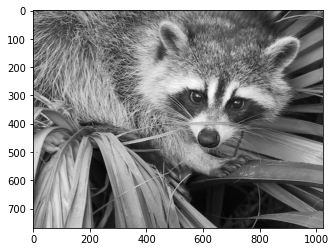

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.imshow(face, cmap='gray')

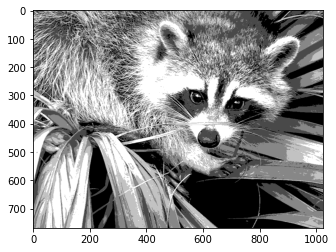

In [8]:
plt.figure()
plt.imshow(face_compressed, cmap='gray')

In [9]:
X.shape

(786432, 1)

The same with three dimensional samples (red, green, blue)

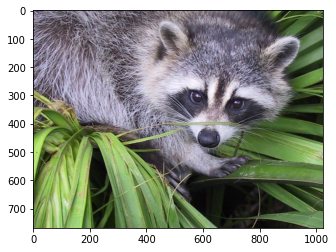

In [10]:
try:
    face2 = sp.face(gray=False)
except AttributeError:
    from scipy import misc
    face2 = misc.face(gray=False)
plt.figure()
plt.imshow(face2)


In [11]:
X2 = face2.reshape((-1, 3)) # We need an (n_sample, n_feature) array
k_means2 = cluster.KMeans(n_clusters=5, n_init=1)
k_means2.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
k_means2.cluster_centers_

array([[ 27.49333437,  31.4758946 ,  21.84573946],
       [157.07909543, 167.09882775, 142.06557959],
       [115.17499837, 124.45725688, 104.31586943],
       [ 75.14765679,  85.17338688,  63.90782488],
       [197.5207794 , 192.857128  , 206.51921977]])

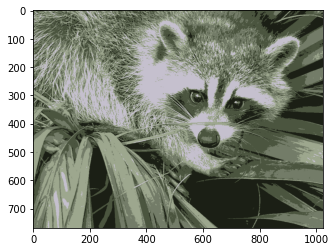

In [13]:
values2 = k_means2.cluster_centers_
labels2 = k_means2.labels_
face_compressed2 = values2[labels2,:].reshape(face2.shape)
plt.figure()
plt.imshow(face_compressed2.astype('uint8'))

# Agglomerative clustering
The same but with agglomerative clustering

In [24]:
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
import numpy
from PIL import Image
# face3 = sp.misc.imresize(face2, 0.20) / 255.
face3 = numpy.array(Image.fromarray(face2).resize(size=(200, 200))) / 255.
#connectivity = grid_to_graph(*face3.shape)
connectivity = grid_to_graph(face3.shape[0],face3.shape[1])
X3 = face3.reshape((-1, 3)) # We need an (n_sample, n_feature) array

In [25]:
agglo = cluster.AgglomerativeClustering(connectivity=connectivity,n_clusters=5,linkage='ward')
agglo.fit(X3)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=<40000x40000 sparse matrix of type '<class 'numpy.int64'>'
	with 199200 stored elements in COOrdinate format>,
                        distance_threshold=None, linkage='ward', memory=None,
                        n_clusters=5)

In [26]:
labels3 = agglo.labels_
cluster_counts = np.bincount(labels3)
values3 = np.zeros((5,3))
for channel in range(0,3):
    values3[:,channel] = np.bincount(labels3,X3[:,channel])/cluster_counts
values3

array([[0.25497097, 0.30871828, 0.20908562],
       [0.65990746, 0.63780186, 0.6960532 ],
       [0.46909701, 0.46934039, 0.46177661],
       [0.56079938, 0.67954734, 0.36321835],
       [0.30033408, 0.37616755, 0.2032208 ]])

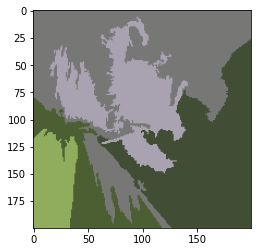

In [27]:
face_compressed3 = values3[labels3,:].reshape(face3.shape)
plt.figure()
plt.imshow(face_compressed3)